In [ ]:
import pandas as pd

In [ ]:
adult = pd.read_csv('adult.csv', na_values = '?')

In [ ]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Так как данных достаточно, то просто удалим строки с отсутствующими значениями

In [ ]:
adult.dropna(inplace = True)

Смотрим основные статистики числовых колонок

In [ ]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Проверим количество уникальных значений в каждой колонке

In [ ]:
adult.nunique()

age                   74
workclass              7
fnlwgt             26741
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         121
capital-loss          97
hours-per-week        96
native-country        41
income                 2
dtype: int64

Построим графики зависимости по всем возможным признакам 

In [ ]:
import seaborn as sns

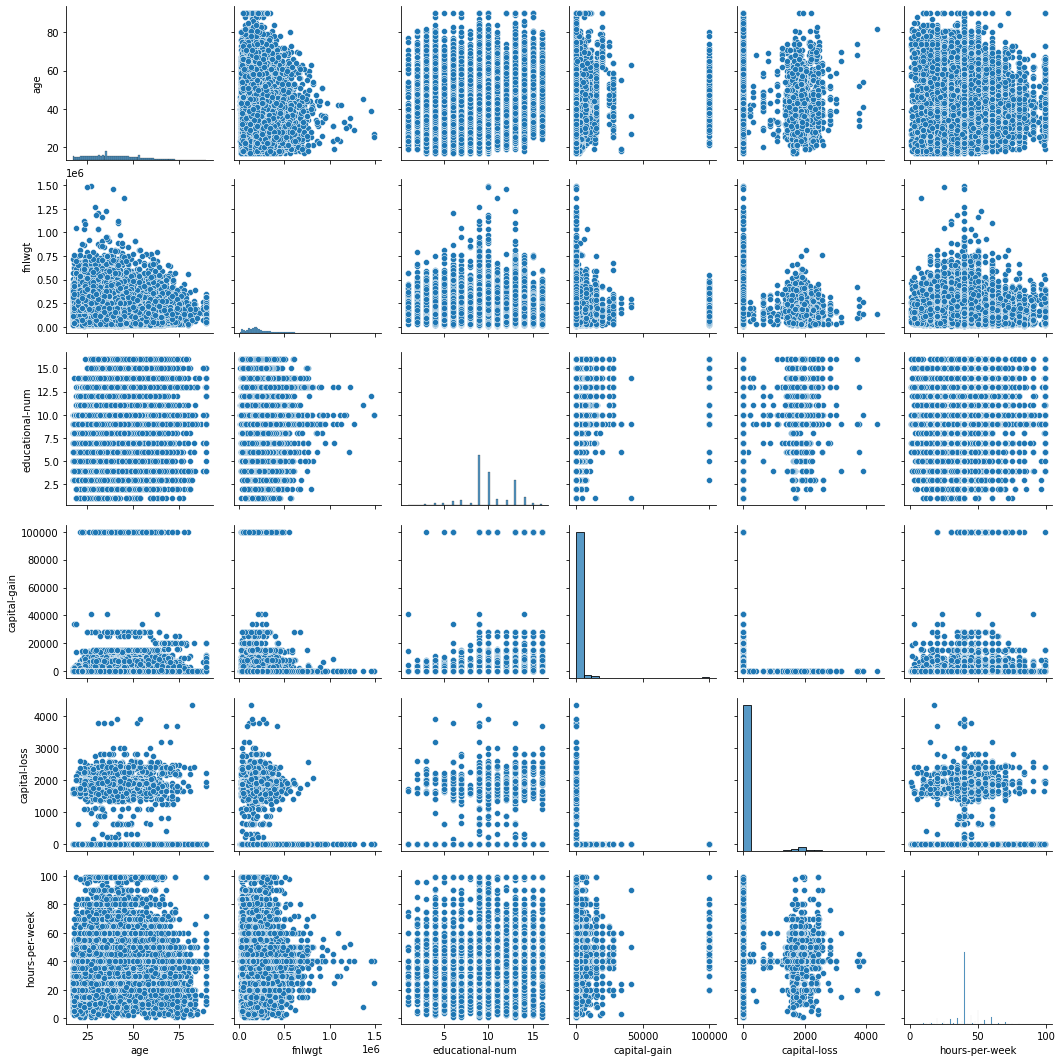

In [ ]:
sns.pairplot(adult)

In [ ]:
import matplotlib.pyplot as plt

Посмотрим распределение целевой переменной в датасете

(array([34014.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11208.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

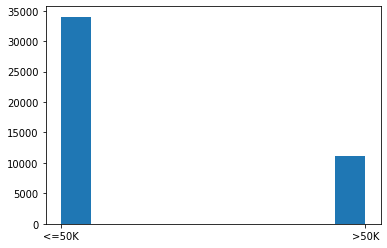

In [ ]:
plt.hist(adult.income)

Так как колонка education-num является числовым представление колонки educational, то колонку educational можем удалить

In [ ]:
adult.drop(columns='education', inplace=True)

Преобразуем колонке с полом в числовые значения 0 и 1

In [ ]:
adult['gender'].replace(['Female','Male'],
                        [0, 1], inplace=True)

In [ ]:
adult.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,<=50K


Преобазуем остальные категориальные переменные в числовые

In [ ]:
dummies = pd.get_dummies(adult[['workclass','marital-status','occupation','relationship','race','native-country']])

In [ ]:
adult = pd.concat([adult, dummies], axis='columns')

In [ ]:
adult.drop(['workclass','marital-status','occupation','relationship','race','native-country'], axis='columns',inplace=True)

Преобразуем нашу целевую переменную income

In [ ]:
adult['income'].replace(['<=50K','>50K'],
                        [0, 1], inplace=True)

Разделяем датафрейм на целевую переменную и признаки

In [ ]:
adult.columns

Index(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport

In [ ]:
X,y=adult[['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week','workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_China',
       'native-country_Columbia', 'native-country_Cuba',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_France', 'native-country_Germany',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Haiti', 'native-country_Holand-Netherlands',
       'native-country_Honduras', 'native-country_Hong',
       'native-country_Hungary', 'native-country_India', 'native-country_Iran',
       'native-country_Ireland', 'native-country_Italy',
       'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos',
       'native-country_Mexico', 'native-country_Nicaragua',
       'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru',
       'native-country_Philippines', 'native-country_Poland',
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia']],adult['income']

In [ ]:
y.head()

0    0
1    0
2    1
3    1
5    0
Name: income, dtype: int64

In [ ]:
X.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,1,0,0,30,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Делим данные на обучающую и тестовую выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Строим и обучаем модель логистической регрессии

In [ ]:
model_lr = LogisticRegression()

In [ ]:
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [ ]:
model_lr.score(X_train, y_train)

0.7912485833540648

In [ ]:
model_lr.score(X_test,y_test)

0.7913764510779436

Строим и обучаем модель опорных векторов

Для обучения SVM ядра мы используем тот же класс SVC библиотеки svm Scikit-Learn. Разница заключается в значении параметра ядра класса SVC. В случае простой SVM мы использовали “linear” в качестве значения параметра ядра. Однако для ядра SVM вы можете использовать гауссово, полиномиальное, сигмоидальное или вычислимое ядро. Мы их реализуем, чтобы увидеть, какое из них лучше подходит для нашей задачи.

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC()

In [ ]:
model_svc.fit(X_train, y_train)
predictions_svc = model_lr.predict(X_test)

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [ ]:
model_svc.score(X_train, y_train)

0.790529894684468

In [ ]:
model_svc.score(X_test,y_test)

0.7927031509121062

**Полиномиальное ядро** В случае полиномиального ядра вы также должны передать значение параметра степени класса SVC. Это в основном степень многочлена.

In [ ]:
model_svc_poly = SVC(kernel='poly', degree=3) 
model_svc_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
predictions_svc_poly = model_svc_poly.predict(X_test)

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [ ]:
model_svc_poly.score(X_train, y_train)

0.7744423252342648

In [ ]:
model_svc_poly.score(X_test,y_test)

0.7764510779436152

**Ядро Гаусса.** Чтобы использовать ядро Гаусса, вы должны указать ‘rbf’ в качестве значения для параметра ядра класса SVC.

In [ ]:
model_svc_gaus = SVC(kernel='rbf') 

In [ ]:
model_svc_gaus.fit(X_train, y_train)

SVC()

In [ ]:
predictions_svc_gaus = model_svc_gaus.predict(X_test)

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [ ]:
model_svc_gaus.score(X_train, y_train)

0.790529894684468

In [ ]:
model_svc_gaus.score(X_test,y_test)

0.7927031509121062

**Сигмоидное ядро.**Чтобы использовать сигмоидное ядро, вы должны указать «сигмоид» в качестве значения для параметра ядра класса SVC.

In [ ]:
model_svc_sig = SVC(kernel='sigmoid') 

In [ ]:
model_svc_sig.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
predictions_svc_sig = model_svc_gaus.predict(X_test)

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [ ]:
model_svc_sig.score(X_train, y_train)

0.637310998700832

In [ ]:
model_svc_sig.score(X_test,y_test)

0.6348258706467662

##Вывод:
Были сделаны следующие преобразования с данными:

- Удалены строки с отсутствующими значениями
-Категориальные переменные заменены на числовые
-Удален категориальный столбец с данными который дублировал столбец с числовыми данными

Точность модели логистической регрессии оказалась немного лучше модели опорных векторов.

Хотя в целом точность предсказания моделей хорошая, можно поэксперементировать с признаками (некоторые убрать и сформировать новые, на основе других признаков) для улучшения качества предсказания. Можно так же собрать больше больше данных и сделать так, чтобы количество данных по целевой переменной для каждой категории были приблизительно равны.
